In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./diamonds/diamonds.csv')

In [131]:
data.info

<bound method DataFrame.info of        Unnamed: 0  carat        cut color clarity  depth  table   price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0   326.0  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0   326.0  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0   327.0  4.05   
3               4   0.29        NaN   NaN     NaN    NaN    NaN     NaN  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0   335.0  4.34   
...           ...    ...        ...   ...     ...    ...    ...     ...   ...   
53935       53936   0.72      Ideal     D     NaN   60.8   57.0  2757.0  5.75   
53936       53937   0.72       Good     D     NaN   63.1   55.0  2757.0  5.69   
53937       53938   0.70  Very Good     D     NaN   62.8   60.0  2757.0  5.66   
53938       53939   0.86    Premium     H     NaN   61.0   58.0  2757.0  6.15   
53939       53940   0.75      Ideal     D     NaN   62.2   55.0  2757.0  5.83

In [132]:
df = pd.DataFrame(data).dropna()

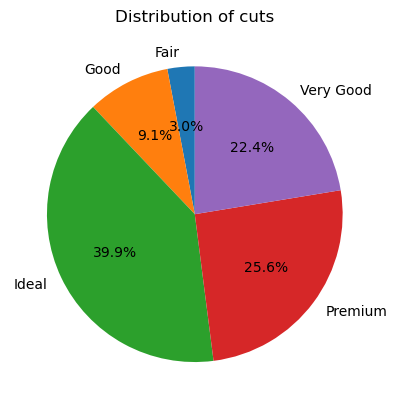

In [133]:
df2 = df.groupby(['cut']).size()

fig, ax = plt.subplots()
ax.pie(df2, labels=df2.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of cuts')

plt.show()

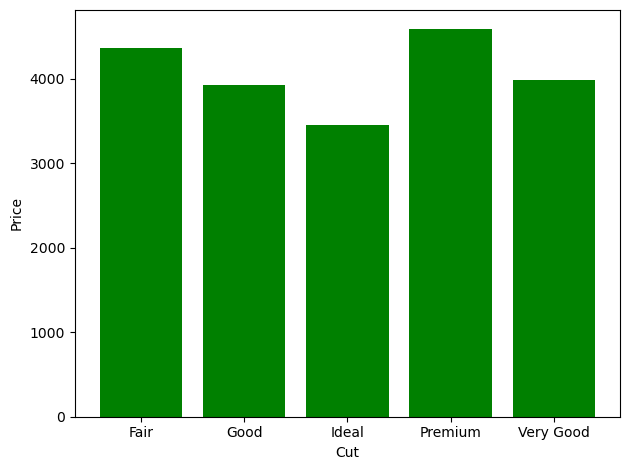

In [134]:
df3 = df.groupby('cut')['price'].mean()

fig, ax = plt.subplots(tight_layout=True)
ax.bar(df3.index, df3, color='green')

ax.set_xlabel('Cut')
ax.set_ylabel('Price')
ax.set_label('Average price per cut')

plt.show()

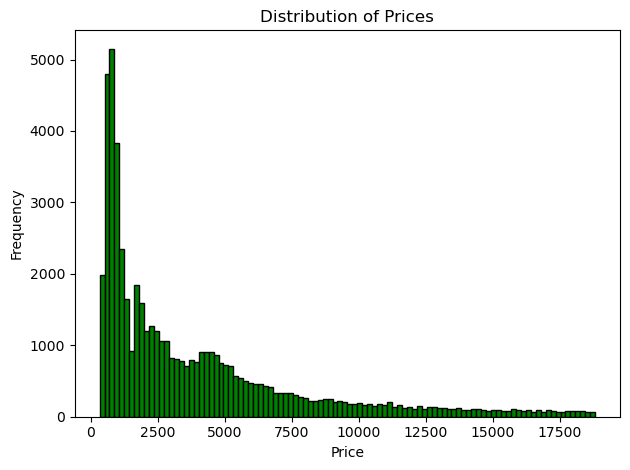

In [135]:
import matplotlib.pyplot as plt

prices = df['price']

fig, ax = plt.subplots(tight_layout=True)
ax.hist(prices, bins=100, color='green', edgecolor='black')

ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Prices')

plt.show()

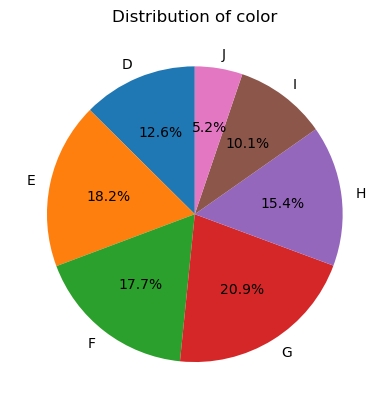

In [136]:
df3 = df.groupby(['color']).size()

fig, ax = plt.subplots()
ax.pie(df3, labels=df3.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of color')

plt.show()

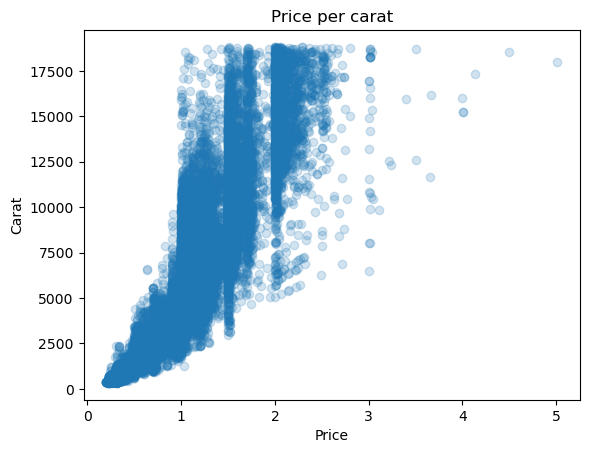

In [137]:
fig, ax = plt.subplots()

ax.scatter(df['carat'], df['price'], marker='o', alpha=0.2)
ax.set_ylabel('Carat')
ax.set_xlabel('Price')

plt.title('Price per carat')

plt.show()

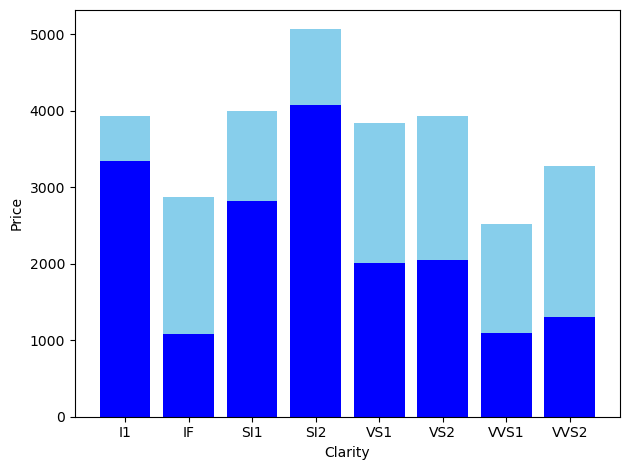

In [138]:
clarity_price_mean = df.groupby('clarity')['price'].mean()
clarity_price_median = df.groupby('clarity')['price'].median()

fig, ax = plt.subplots(tight_layout=True)

ax.bar(clarity_price_mean.index, clarity_price_mean, color='skyblue')
ax.bar(clarity_price_median.index, clarity_price_median, color='blue')

ax.set_xlabel('Clarity')
ax.set_ylabel('Price')
ax.set_label('Average price per clarity')

plt.show()

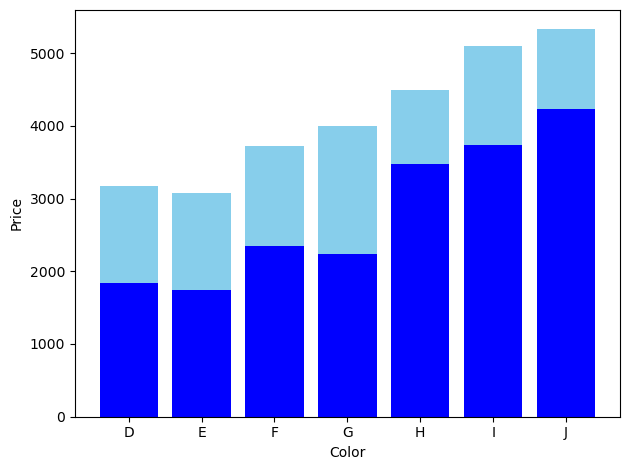

In [139]:
clarity_price_mean = df.groupby('color')['price'].mean()
clarity_price_median = df.groupby('color')['price'].median()

fig, ax = plt.subplots(tight_layout=True)

ax.bar(clarity_price_mean.index, clarity_price_mean, color='skyblue')
ax.bar(clarity_price_median.index, clarity_price_median, color='blue')

ax.set_xlabel('Color')
ax.set_ylabel('Price')
ax.set_label('Average price per color')

plt.show()

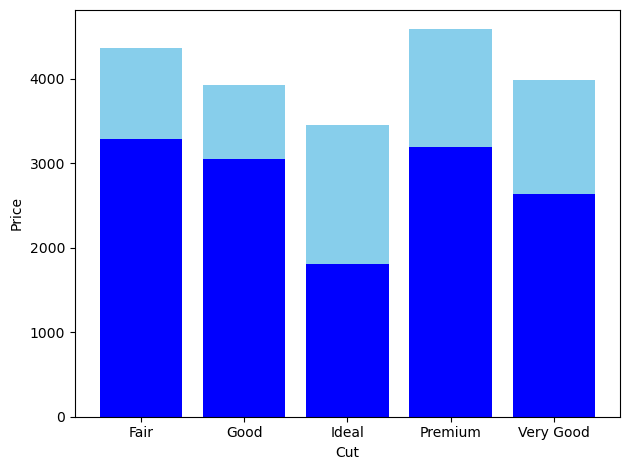

In [140]:
clarity_price_mean = df.groupby('cut')['price'].mean()
clarity_price_median = df.groupby('cut')['price'].median()

fig, ax = plt.subplots(tight_layout=True)

ax.bar(clarity_price_mean.index, clarity_price_mean, color='skyblue')
ax.bar(clarity_price_median.index, clarity_price_median, color='blue')

ax.set_xlabel('Cut')
ax.set_ylabel('Price')
ax.set_label('Average price per cut')

plt.show()

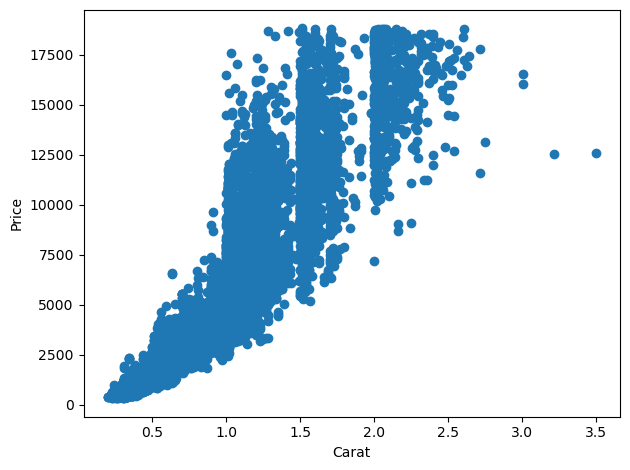

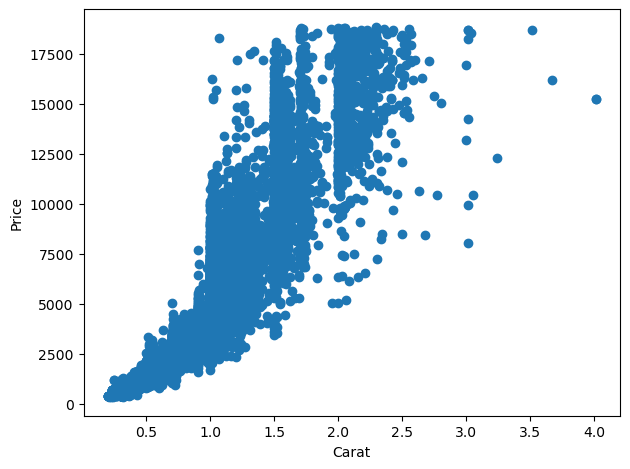

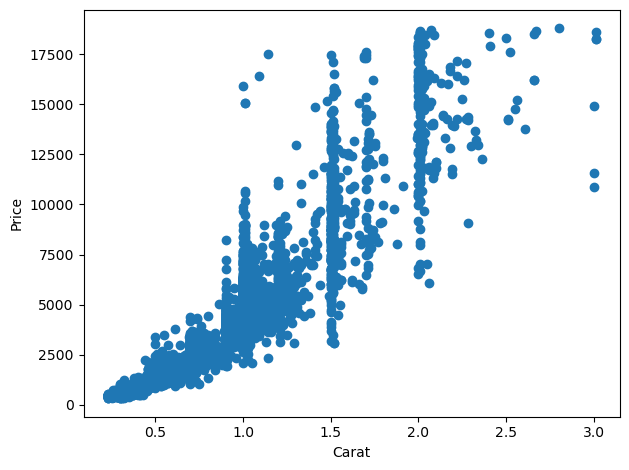

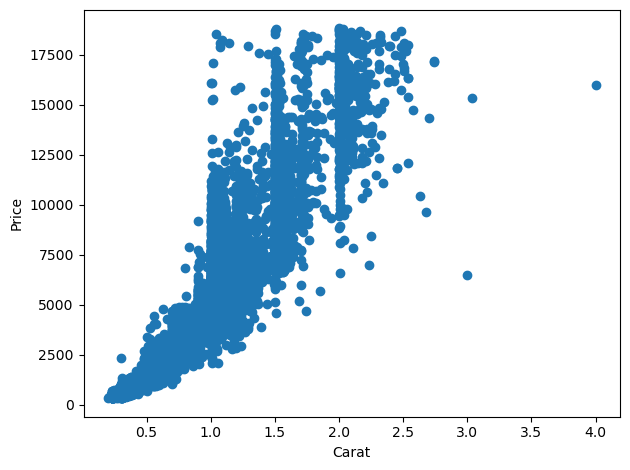

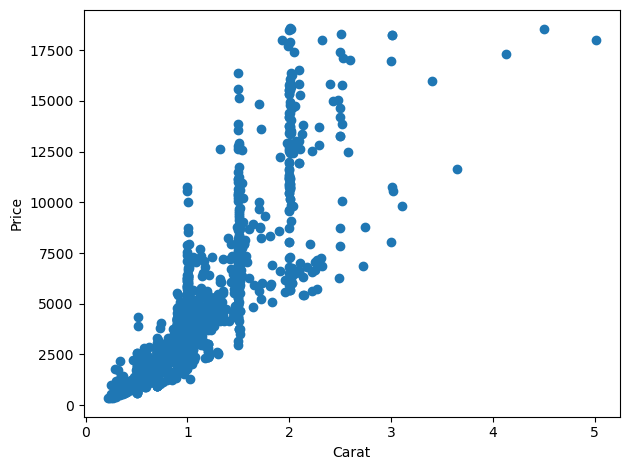

In [141]:
fair_cut_stones = df['cut'].unique()

for cut in fair_cut_stones:
    filtered_df = df[df['cut'] == cut]

    fig, ax = plt.subplots(tight_layout=True)

    ax.scatter(filtered_df['carat'], filtered_df['price'])

    ax.set_xlabel('Carat')
    ax.set_ylabel('Price')
    ax.set_label(f'Price per carat ({cut})')

<Axes: title={'center': 'Price distribution by clarity'}, xlabel='clarity', ylabel='price'>

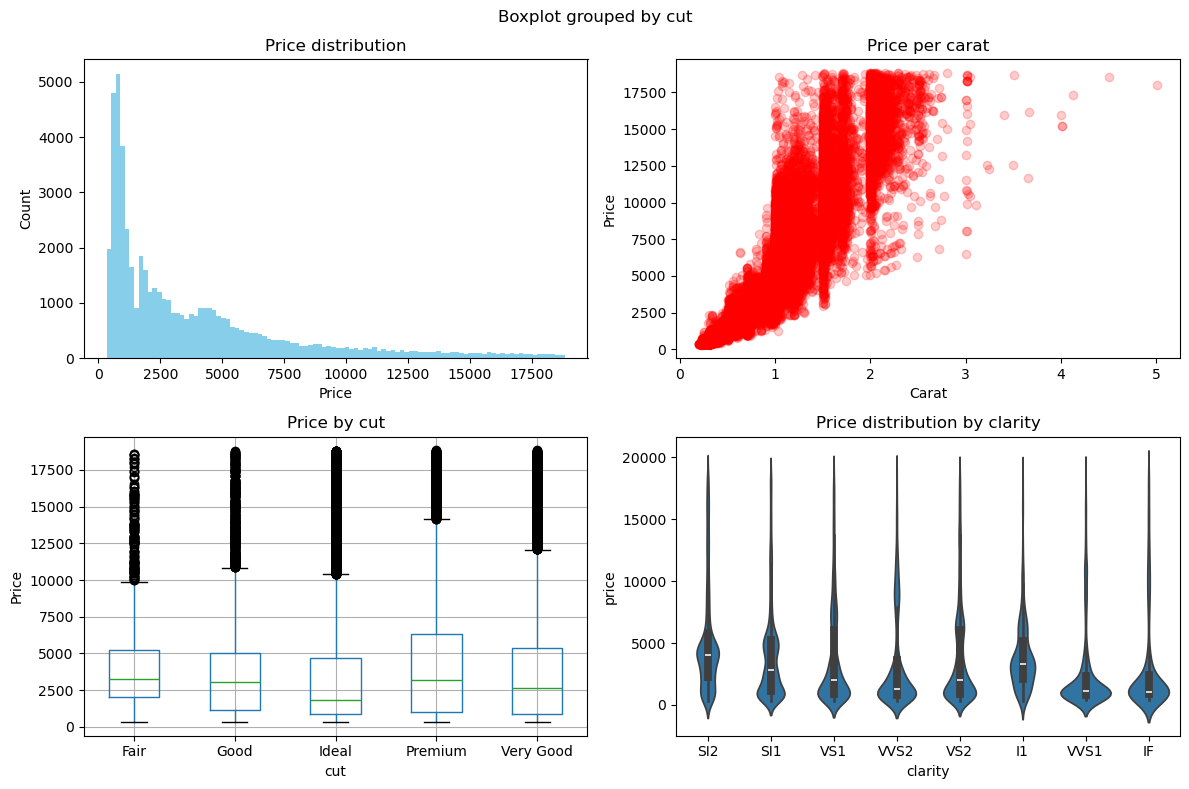

In [142]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), tight_layout=True)

# Histogram
axes[0, 0].hist(df['price'], bins=100, color='skyblue')
axes[0, 0].set_title('Price distribution')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Count')

# Scatter
axes[0, 1].scatter(df['carat'], df['price'], marker='o', alpha=0.2, color='red')
axes[0, 1].set_title('Price per carat')
axes[0, 1].set_ylabel('Price')
axes[0, 1].set_xlabel('Carat')

# Box plot of price but cut type
df.boxplot(column='price', by='cut', ax=axes[1, 0])
axes[1, 0].set_title('Price by cut')
axes[1, 0].set_ylabel('Price')

# Advanced visualizationx
axes[1, 1].set_title('Price distribution by clarity')
sns.violinplot(x='clarity', y='price', data=df, ax=axes[1, 1])


           Average Price  Average Carat  Median Price  Median Carat
cut                                                                
Fair         4362.234599       1.046571        3285.0      1.046571
Good         3930.686531       0.849347        3054.0      0.849347
Ideal        3459.228760       0.702936        1809.0      0.702936
Premium      4587.116669       0.892245        3196.0      0.892245
Very Good    3982.911080       0.806473        2643.0      0.806473


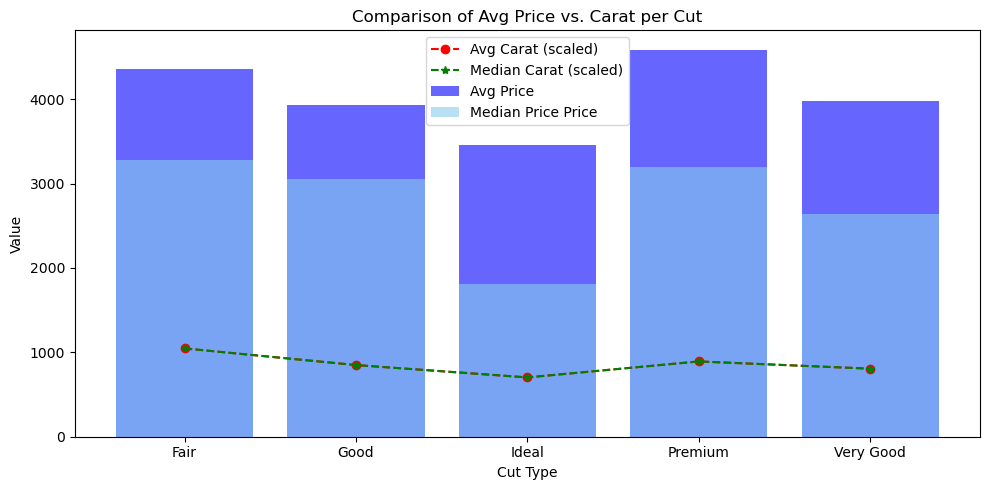

In [143]:
avg_price_per_cut = df.groupby('cut')['price'].mean()
median_price_per_cut = df.groupby('cut')['price'].median()

avg_carat_per_cut = df.groupby('cut')['carat'].mean()
median_carat_per_cut = df.groupby('cut')['carat'].mean()


cut_df = pd.DataFrame({'Average Price': avg_price_per_cut, 'Average Carat': avg_carat_per_cut, 'Median Price': median_price_per_cut, 'Median Carat': median_carat_per_cut})

print(cut_df)

fig, ax = plt.subplots(tight_layout=True, figsize=(10, 5))

ax.bar(cut_df.index, cut_df['Average Price'], color='blue', alpha=0.6, label='Avg Price')
ax.bar(cut_df.index, cut_df['Median Price'], color='skyblue', alpha=0.6, label='Median Price Price')


ax.plot(cut_df.index, cut_df['Average Carat'] * 1000, color='red', marker='o', linestyle='--', label='Avg Carat (scaled)')
ax.plot(cut_df.index, cut_df['Median Carat'] * 1000, color='green', marker='*', linestyle='--', label='Median Carat (scaled)')


ax.set_xlabel('Cut Type')
ax.set_ylabel('Value')
ax.set_title('Comparison of Avg Price vs. Carat per Cut')

ax.legend()

plt.show()

       Average Price  Median Price  Average Carat  Median Carat
color                                                          
D        3170.583149        1832.0       0.657753      0.657753
E        3077.679006        1736.0       0.657812      0.657812
F        3726.588600        2343.5       0.736671      0.736671
G        4000.284144        2241.0       0.771209      0.771209
H        4490.484563        3472.0       0.912319      0.912319
I        5096.141854        3734.0       1.027481      1.027481
J        5325.510517        4234.0       1.162303      1.162303


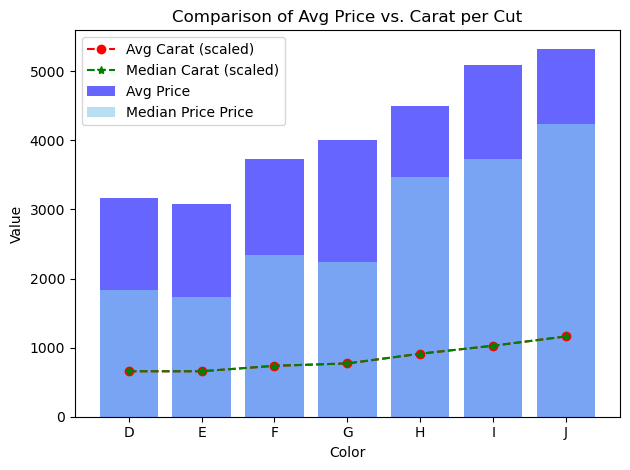

In [144]:
avg_price_per_color = df.groupby('color')['price'].mean()
median_price_per_color = df.groupby('color')['price'].median()

avg_carat_per_color = df.groupby('color')['carat'].mean()
median_carat_per_color = df.groupby('color')['carat'].mean()


color_df = pd.DataFrame({'Average Price': avg_price_per_color, 'Median Price': median_price_per_color, 'Average Carat': avg_carat_per_color, 'Median Carat': median_carat_per_color})
print(color_df)

fig, ax = plt.subplots(tight_layout=True)

ax.bar(color_df.index, color_df['Average Price'], color='blue', alpha=0.6, label='Avg Price')
ax.bar(color_df.index, color_df['Median Price'], color='skyblue', alpha=0.6, label='Median Price Price')


ax.plot(color_df.index, color_df['Average Carat'] * 1000, color='red', marker='o', linestyle='--', label='Avg Carat (scaled)')
ax.plot(color_df.index, color_df['Median Carat'] * 1000, color='green', marker='*', linestyle='--', label='Median Carat (scaled)')


ax.set_xlabel('Color')
ax.set_ylabel('Value')
ax.set_title('Comparison of Avg Price vs. Carat per Cut')

ax.legend()

plt.show()


            Unnamed: 0     carat     depth     table     price         x  \
Unnamed: 0    1.000000 -0.378476 -0.034478 -0.101118 -0.307229 -0.406104   
carat        -0.378476  1.000000  0.028215  0.181626  0.921615  0.975110   
depth        -0.034478  0.028215  1.000000 -0.295803 -0.010689 -0.025274   
table        -0.101118  0.181626 -0.295803  1.000000  0.127174  0.195374   
price        -0.307229  0.921615 -0.010689  0.127174  1.000000  0.884512   
x            -0.406104  0.975110 -0.025274  0.195374  0.884512  1.000000   
y            -0.396500  0.951722 -0.029322  0.183792  0.865479  0.974687   
z            -0.399817  0.953389  0.094883  0.150970  0.861309  0.970765   

                   y         z  
Unnamed: 0 -0.396500 -0.399817  
carat       0.951722  0.953389  
depth      -0.029322  0.094883  
table       0.183792  0.150970  
price       0.865479  0.861309  
x           0.974687  0.970765  
y           1.000000  0.951988  
z           0.951988  1.000000  


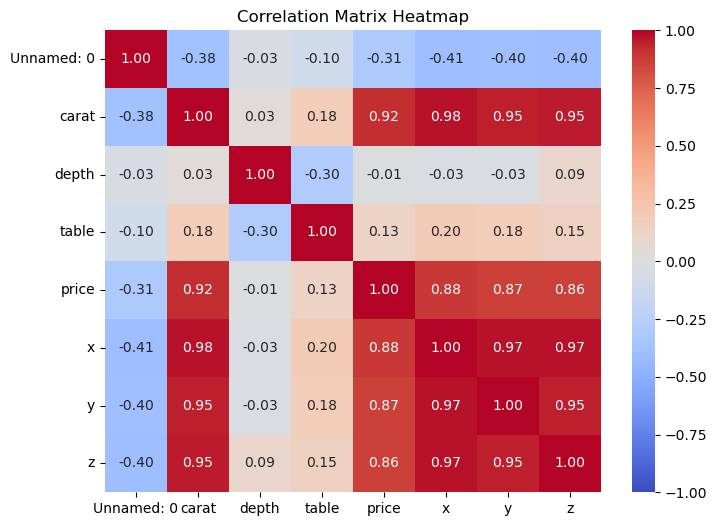

In [145]:

numeric_cols = df.select_dtypes(include=['number'])

correlation_matrix = numeric_cols.corr()
print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


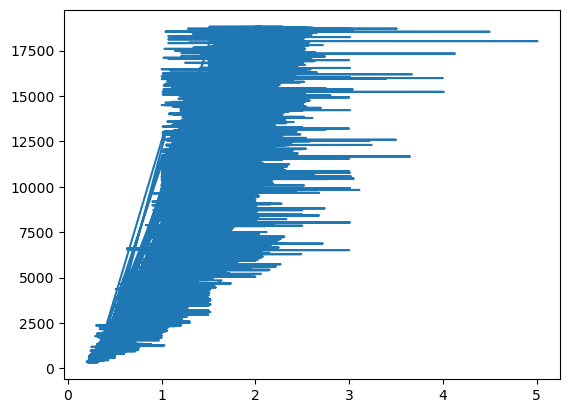

In [166]:
fil_df = df[(df['x'] != 0) & (df['y'] != 0) & (df['z'] != 0)]



fig, ax = plt.subplots()

ax.plot(fil_df['carat'], fil_df['price'])

plt.show()


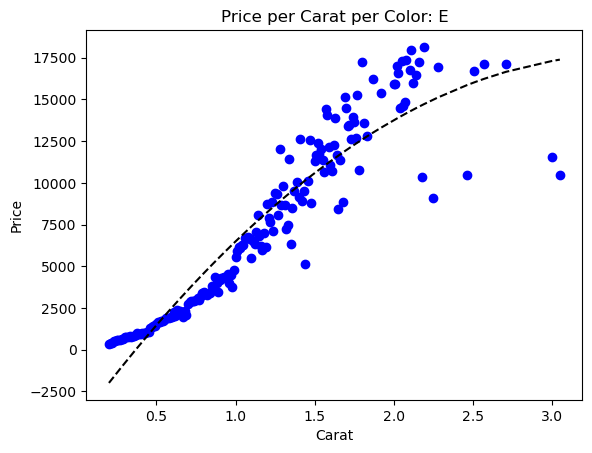

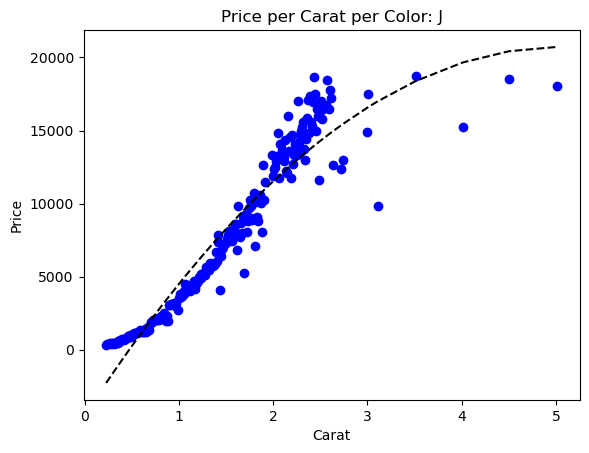

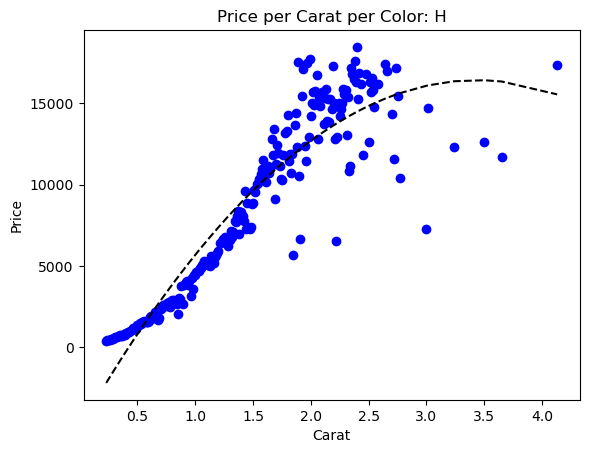

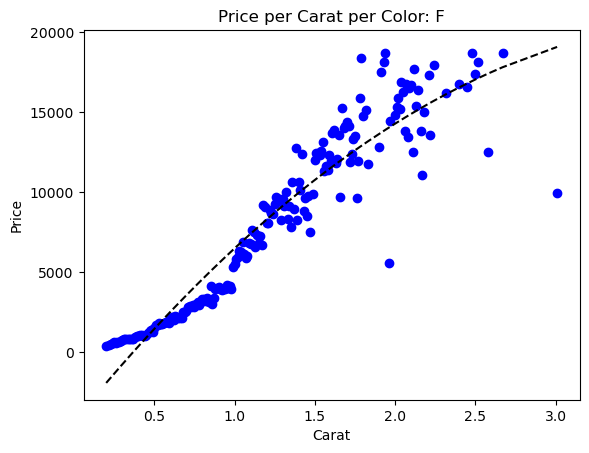

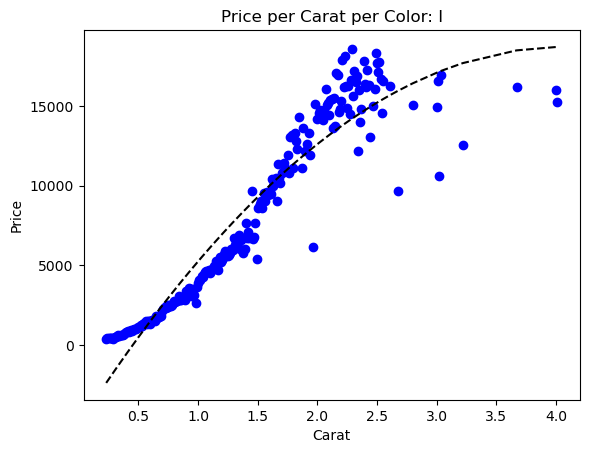

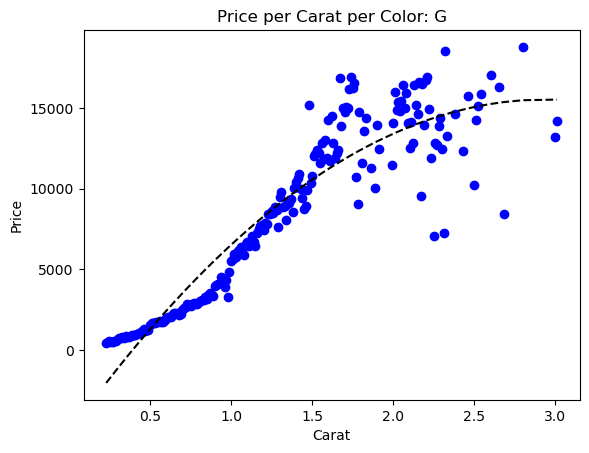

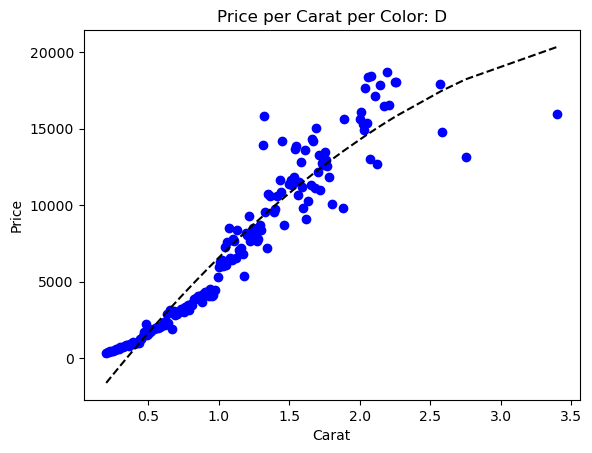

In [146]:
colours = df['color'].unique()

for color in colours:
    filtered_df = df[df['color'] == color]
    avg_price_per_carat = filtered_df.groupby('carat')['price'].mean()

    fig, ax = plt.subplots()
    plt.scatter(avg_price_per_carat.index, avg_price_per_carat, color='blue')

    x = avg_price_per_carat.index
    y = avg_price_per_carat.values
    coeffs = np.polyfit(x, y, deg=2)
    trend = np.poly1d(coeffs)
    
    ax.plot(x, trend(x), color="black", linestyle="--", label="Trend Line")


    ax.set_title(f'Price per Carat per Color: {color}')
    ax.set_xlabel('Carat')
    ax.set_ylabel('Price')

       Unnamed: 0  carat        cut color clarity  depth  table   price     x  \
25             26   0.23  Very Good     G    VVS2   60.4   58.0   354.0  3.97   
51             52   0.23      Ideal     G     VS1   61.9   54.0   404.0  3.93   
65             66   0.28      Ideal     G    VVS2   61.4   56.0   553.0  4.19   
67             68   0.31  Very Good     G     SI1   63.3   57.0   553.0  4.33   
68             69   0.31    Premium     G     SI1   61.8   58.0   553.0  4.35   
...           ...    ...        ...   ...     ...    ...    ...     ...   ...   
53888       53889   0.83    Premium     G     SI2   61.6   57.0  2749.0  6.06   
53889       53890   0.80      Ideal     G     SI2   62.2   56.0  2749.0  5.95   
53894       53895   0.71      Ideal     G     SI1   60.5   56.4  2751.0  5.76   
53896       53897   0.83      Ideal     G     SI2   62.4   54.0  2751.0  6.01   
53913       53914   0.80       Good     G     VS2   64.2   58.0  2753.0  5.84   

          y     z  
25     

Text(0, 0.5, 'Price')

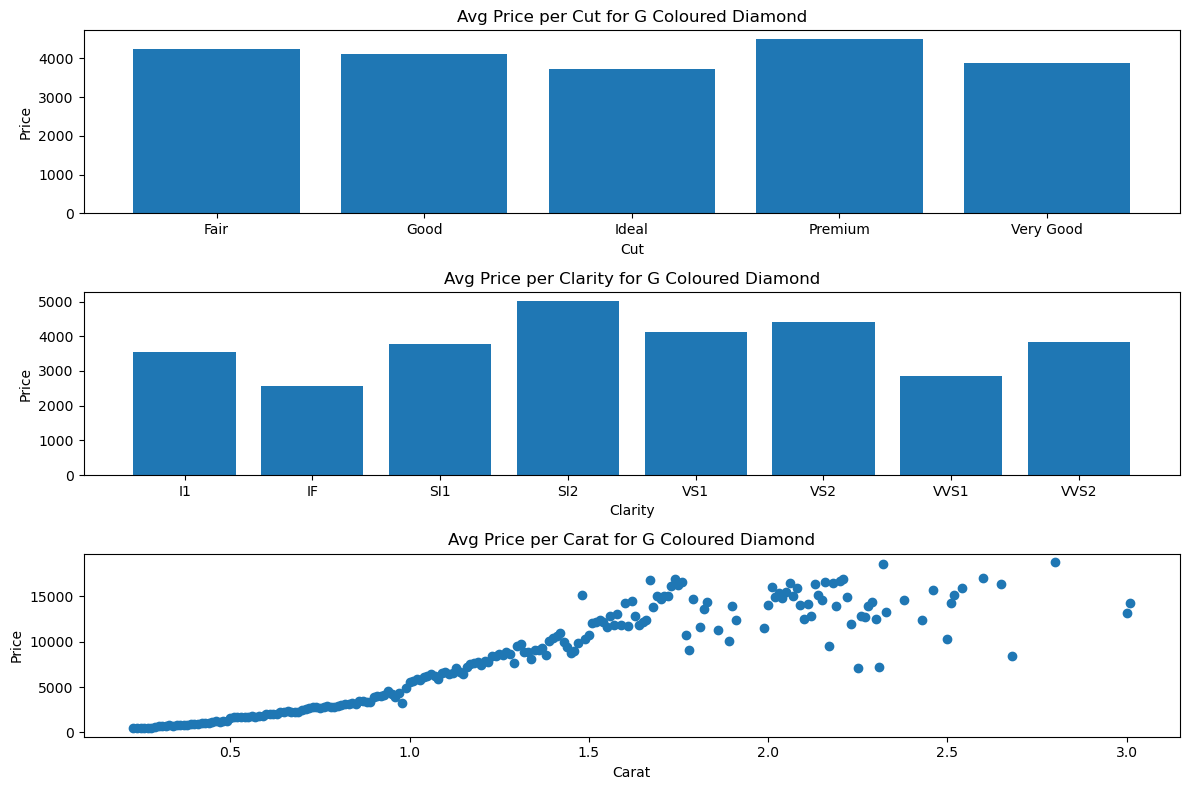

In [147]:
g_coloured_diamonds = df[df['color'] == 'G']

avg_g_price_per_cut = g_coloured_diamonds.groupby('cut')['price'].mean()
avg_g_price_per_clarity = g_coloured_diamonds.groupby('clarity')['price'].mean()
avg_g_price_per_carat = g_coloured_diamonds.groupby('carat')['price'].mean()

print(g_coloured_diamonds)

fig, axes = plt.subplots(3, figsize=(12, 8), tight_layout=True)

# Cut
axes[0].bar(avg_g_price_per_cut.index, avg_g_price_per_cut)
axes[0].set_title('Avg Price per Cut for G Coloured Diamond')
axes[0].set_xlabel('Cut')
axes[0].set_ylabel('Price')

# Clarity
axes[1].bar(avg_g_price_per_clarity.index, avg_g_price_per_clarity)
axes[1].set_title('Avg Price per Clarity for G Coloured Diamond')
axes[1].set_xlabel('Clarity')
axes[1].set_ylabel('Price')

# Carat
axes[2].scatter(avg_g_price_per_carat.index, avg_g_price_per_carat)
axes[2].set_title('Avg Price per Carat for G Coloured Diamond')
axes[2].set_xlabel('Carat')
axes[2].set_ylabel('Price')



       Unnamed: 0  carat        cut color clarity  depth  table   price     x  \
92             93   0.70      Ideal     G     VS2   61.6   56.0  2757.0  5.70   
94             95   0.78  Very Good     G     SI2   63.8   56.0  2759.0  5.81   
102           103   0.74      Ideal     G     SI1   61.6   55.0  2760.0  5.80   
103           104   0.75    Premium     G     VS2   61.7   58.0  2760.0  5.85   
105           106   0.75      Ideal     G     SI1   62.2   55.0  2760.0  5.87   
...           ...    ...        ...   ...     ...    ...    ...     ...   ...   
53888       53889   0.83    Premium     G     SI2   61.6   57.0  2749.0  6.06   
53889       53890   0.80      Ideal     G     SI2   62.2   56.0  2749.0  5.95   
53894       53895   0.71      Ideal     G     SI1   60.5   56.4  2751.0  5.76   
53896       53897   0.83      Ideal     G     SI2   62.4   54.0  2751.0  6.01   
53913       53914   0.80       Good     G     VS2   64.2   58.0  2753.0  5.84   

          y     z  
92     

Text(0, 0.5, 'Price')

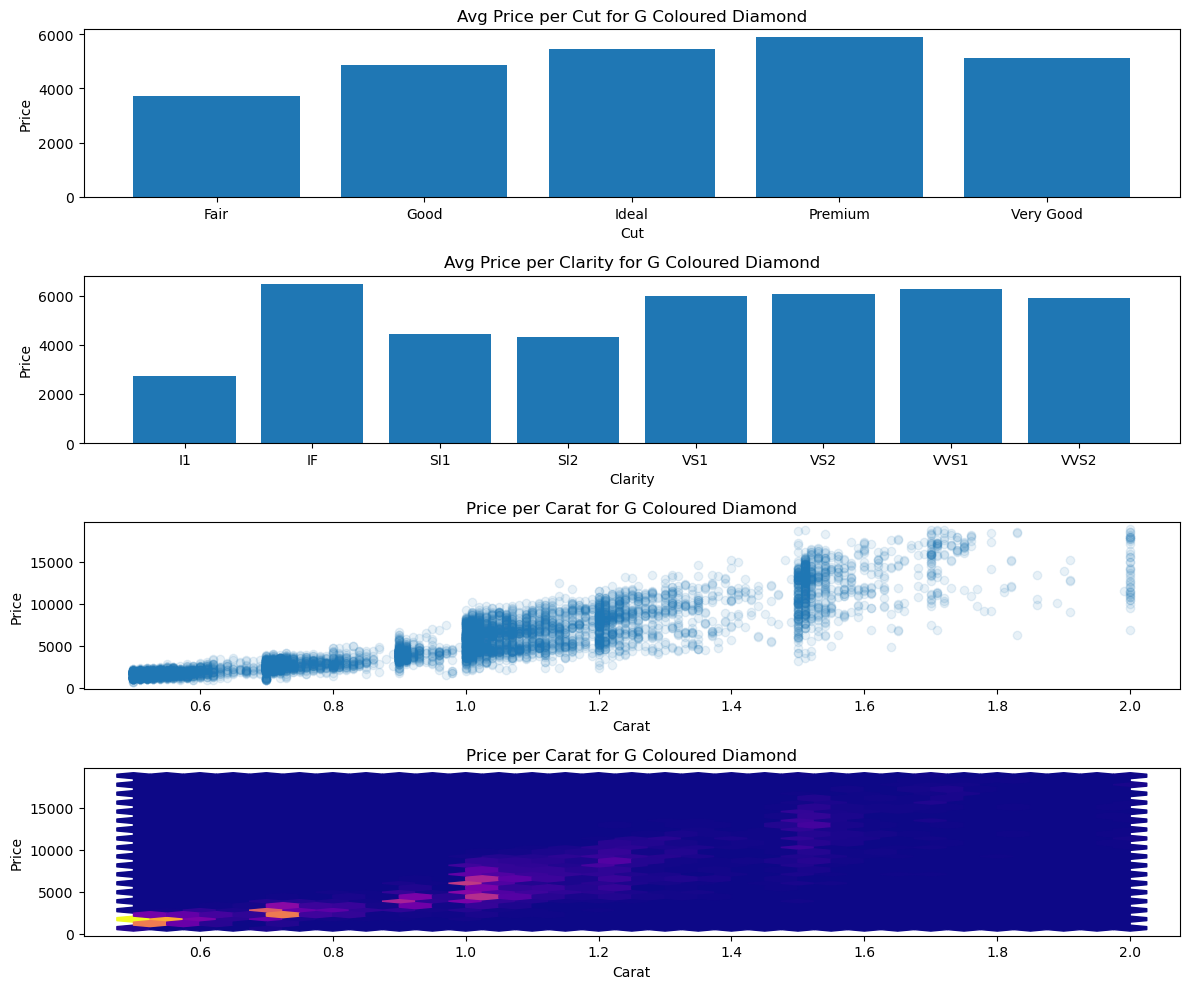

In [148]:
g_coloured_diamonds = df[df['color'] == 'G']
g_sorted_by_carat = g_coloured_diamonds[(g_coloured_diamonds['carat'] >= 0.5) & (g_coloured_diamonds['carat'] <= 2)]

print(g_sorted_by_carat)

avg_g_price_per_cut = g_sorted_by_carat.groupby('cut')['price'].mean()
avg_g_price_per_clarity = g_sorted_by_carat.groupby('clarity')['price'].mean()

print(g_sorted_by_carat)

fig, axes = plt.subplots(4, figsize=(12, 10), tight_layout=True)

# Cut Bar
axes[0].bar(avg_g_price_per_cut.index, avg_g_price_per_cut)
axes[0].set_title('Avg Price per Cut for G Coloured Diamond')
axes[0].set_xlabel('Cut')
axes[0].set_ylabel('Price')

# Clarity Bar
axes[1].bar(avg_g_price_per_clarity.index, avg_g_price_per_clarity)
axes[1].set_title('Avg Price per Clarity for G Coloured Diamond')
axes[1].set_xlabel('Clarity')
axes[1].set_ylabel('Price')

# Carat Scatterchart
axes[2].scatter(g_sorted_by_carat['carat'], g_sorted_by_carat['price'], alpha=0.1)
axes[2].set_title('Price per Carat for G Coloured Diamond')
axes[2].set_xlabel('Carat')
axes[2].set_ylabel('Price')

# Carat Hexbin
axes[3].hexbin(g_sorted_by_carat['carat'], g_sorted_by_carat['price'], gridsize=30, cmap='plasma')
axes[3].set_title('Price per Carat for G Coloured Diamond')
axes[3].set_xlabel('Carat')
axes[3].set_ylabel('Price')

       Unnamed: 0  carat        cut color clarity  depth  table   price     x  \
92             93   0.70      Ideal     G     VS2   61.6   56.0  2757.0  5.70   
103           104   0.75    Premium     G     VS2   61.7   58.0  2760.0  5.85   
117           118   0.71      Ideal     G     VS2   62.4   54.0  2762.0  5.72   
139           140   0.64      Ideal     G    VVS1   61.9   56.0  2766.0  5.53   
140           141   0.71    Premium     G     VS2   60.9   57.0  2766.0  5.78   
...           ...    ...        ...   ...     ...    ...    ...     ...   ...   
53867       53868   0.76    Premium     G     VS2   61.8   58.0  2744.0  5.85   
53880       53881   0.73    Premium     G     VS2   60.7   58.0  2746.0  5.82   
53881       53882   0.72      Ideal     G     VS1   62.6   53.0  2746.0  5.76   
53883       53884   0.70  Very Good     G     VS1   61.4   55.0  2748.0  5.70   
53913       53914   0.80       Good     G     VS2   64.2   58.0  2753.0  5.84   

          y     z  
92     

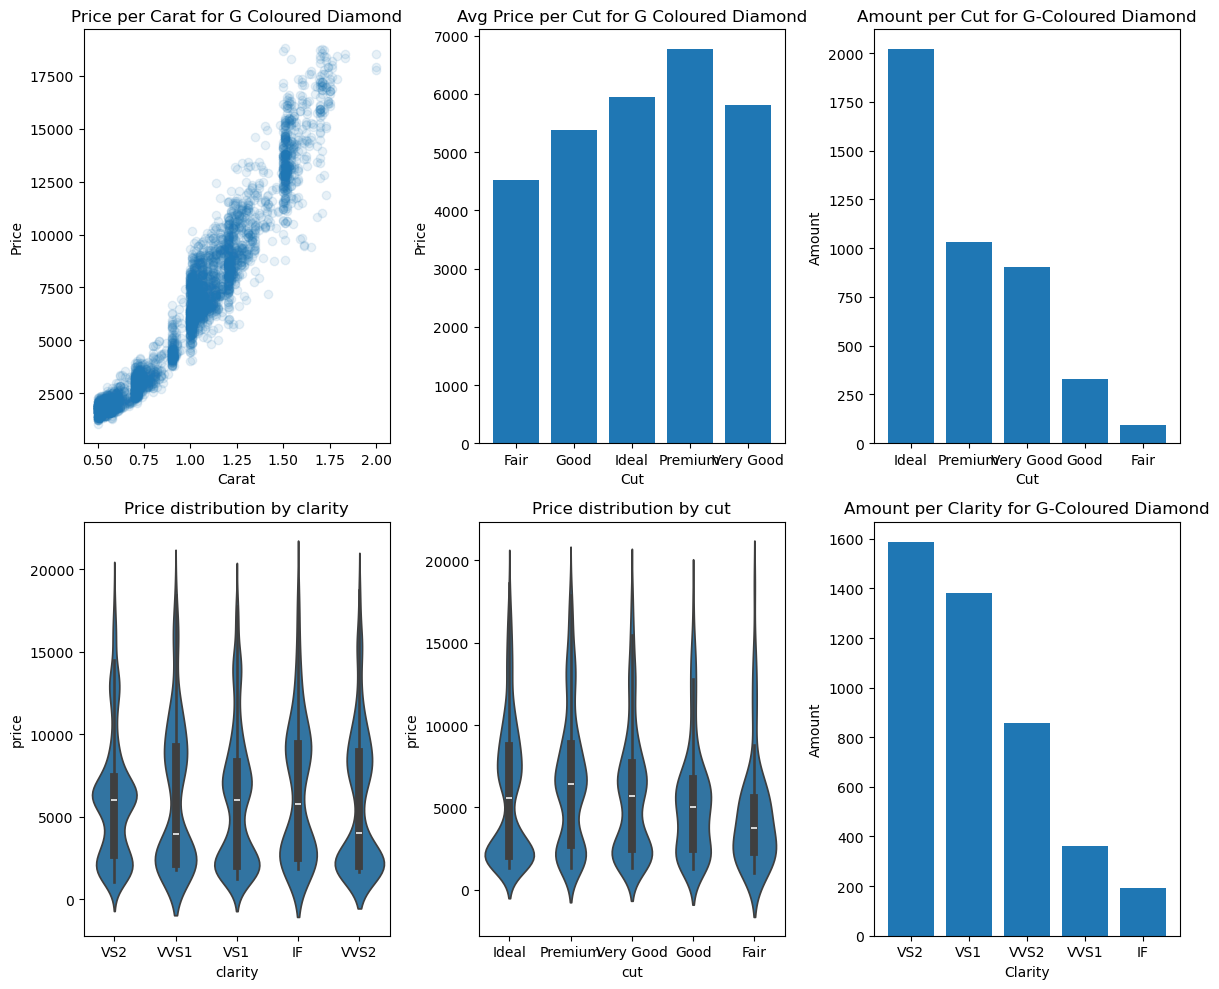

In [149]:
g_sorted_by_clarity = g_sorted_by_carat[g_sorted_by_carat['clarity'].isin(['VVS1', 'VVS2', 'VS1', 'VS2', 'IF'])]
g_clarity_price_mean = g_sorted_by_clarity.groupby('cut')['price'].mean()

cut_counts = g_sorted_by_clarity["cut"].value_counts()
clarity_counts = g_sorted_by_clarity["clarity"].value_counts()


print(g_sorted_by_clarity)

# Carat Scatterchart
fig, axes = plt.subplots(2, 3, figsize=(12, 10), tight_layout=True)

axes[0, 0].scatter(g_sorted_by_clarity['carat'], g_sorted_by_clarity['price'], alpha=0.1)
axes[0, 0].set_title('Price per Carat for G Coloured Diamond')
axes[0, 0].set_xlabel('Carat')
axes[0, 0].set_ylabel('Price')

# Avg price
axes[0, 1].bar(g_clarity_price_mean.index, g_clarity_price_mean)
axes[0, 1].set_title('Avg Price per Cut for G Coloured Diamond')
axes[0, 1].set_xlabel('Cut')
axes[0, 1].set_ylabel('Price')

axes[0, 2].bar(cut_counts.index, cut_counts)
axes[0, 2].set_title('Amount per Cut for G-Coloured Diamond')
axes[0, 2].set_xlabel('Cut')
axes[0, 2].set_ylabel('Amount')

sns.violinplot(x='clarity', y='price', data=g_sorted_by_clarity, ax=axes[1, 0])
axes[1, 0].set_title('Price distribution by clarity')

sns.violinplot(x='cut', y='price', data=g_sorted_by_clarity, ax=axes[1, 1])
axes[1, 1].set_title('Price distribution by cut')

axes[1, 2].bar(clarity_counts.index, clarity_counts)
axes[1, 2].set_title('Amount per Clarity for G-Coloured Diamond')
axes[1, 2].set_xlabel('Clarity')
axes[1, 2].set_ylabel('Amount')

plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 2018 entries, 92 to 53881
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2018 non-null   int64  
 1   carat       2018 non-null   float64
 2   cut         2018 non-null   object 
 3   color       2018 non-null   object 
 4   clarity     2018 non-null   object 
 5   depth       2018 non-null   float64
 6   table       2018 non-null   float64
 7   price       2018 non-null   float64
 8   x           2018 non-null   float64
 9   y           2018 non-null   float64
 10  z           2018 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 189.2+ KB


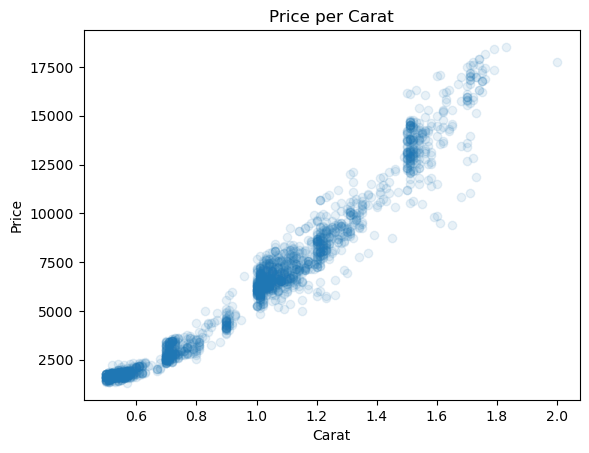

In [150]:
# g_sorted_by_clarity

cut_sort = g_sorted_by_clarity[g_sorted_by_clarity['cut'].isin(['Ideal', 'Premium', 'Very Good Cut'])]
clarity_cut_sort = cut_sort[cut_sort['clarity'].isin(['VS1', 'VS2'])]

clarity_cut_sort.info()

fig, ax = plt.subplots()

ax.scatter(clarity_cut_sort['carat'], clarity_cut_sort['price'], alpha=0.1)
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
ax.set_title('Price per Carat')

plt.show()



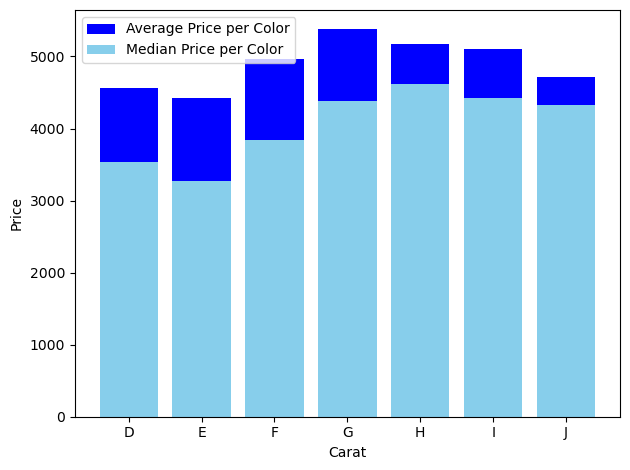

In [151]:
sorted_carat = df[(df['carat'] >= 0.5) & (df['carat'] <= 2)]
avg_price_per_color = sorted_carat.groupby('color')['price'].mean()
median_price_per_color = sorted_carat.groupby('color')['price'].median()

fig, ax = plt.subplots(tight_layout=True)

ax.bar(avg_price_per_color.index, avg_price_per_color, color='blue', label='Average Price per Color')
ax.bar(median_price_per_color.index, median_price_per_color, color='skyblue', label='Median Price per Color')

ax.set_xlabel('Carat')
ax.set_ylabel('Price')
ax.set_label('Average price per clarity')

ax.legend()
plt.show()

In [167]:
diamonds = df['carat'].nsmallest()

print(diamonds)

df['carat'].sort_values()


31591    0.2
31592    0.2
31593    0.2
31594    0.2
31595    0.2
Name: carat, dtype: float64


31592    0.20
31598    0.20
31599    0.20
31600    0.20
31601    0.20
         ... 
25999    4.01
25998    4.01
27130    4.13
27630    4.50
27415    5.01
Name: carat, Length: 53864, dtype: float64

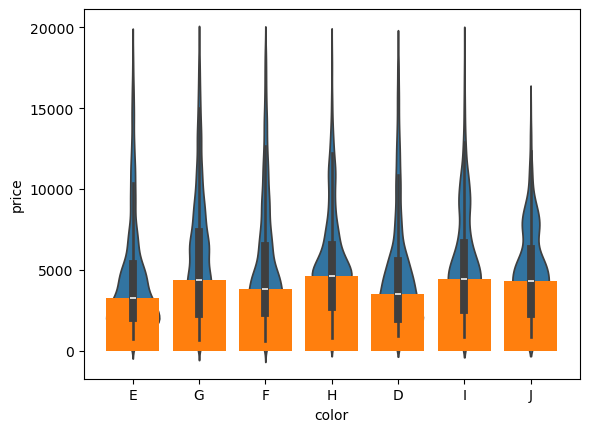

In [190]:
df4 = fil_df[(fil_df['carat'] >= 0.5) & (fil_df['carat'] <= 2)]

color_fil = df4.groupby('color')['price'].mean()
color_fil2 = df4.groupby('color')['price'].median()


fig, ax = plt.subplots()

sns.violinplot(x='color', y='price', data=df4)
ax.bar(color_fil2.index, color_fil2)

plt.show()